## Finding the MRI Brain Tumor Detection Dataset 

Dataset Link : https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection

## Import the packages

In [1]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
import cv2
import sys
import random
from PIL import Image


## Reading the Images

In [2]:
tumor=[]
path = './Data/brain_tumor_dataset/yes/*.jpg'
for f in glob.iglob(path):
    img = cv2.imread(f)
    img = cv2.resize(img,(128,128))
    b, g, r = cv2.split(img)
    img = cv2.merge([r,g,b])
    tumor.append(img)
for img in tumor:
    print(img.shape)
    
no_tumor=[]
path = './Data/brain_tumor_dataset/no/*.jpg'
for f in glob.iglob(path):
    img = cv2.imread(f)
    img = cv2.resize(img,(128,128))
    b, g, r = cv2.split(img)
    img = cv2.merge([r,g,b])
    no_tumor.append(img)    
    

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

In [3]:
no_tumor = np.array(no_tumor)
tumor = np.array(tumor)
All = np.concatenate((no_tumor,tumor))


In [4]:
np.random.choice(5,3, replace= False)

array([2, 1, 4])

## Visualizing Brain MRI Images

In [5]:
def plot_random(no_tumor, tumor, num = 5):
    no_tumor_imgs = no_tumor[np.random.choice(no_tumor.shape[0], num , replace= False)]
    tumor_imgs = tumor[np.random.choice(tumor.shape[0], num , replace= False)]
    
    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('no_tumor')
        plt.imshow(no_tumor_imgs[i])
        
    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('tumor')
        plt.imshow(tumor_imgs[i])    

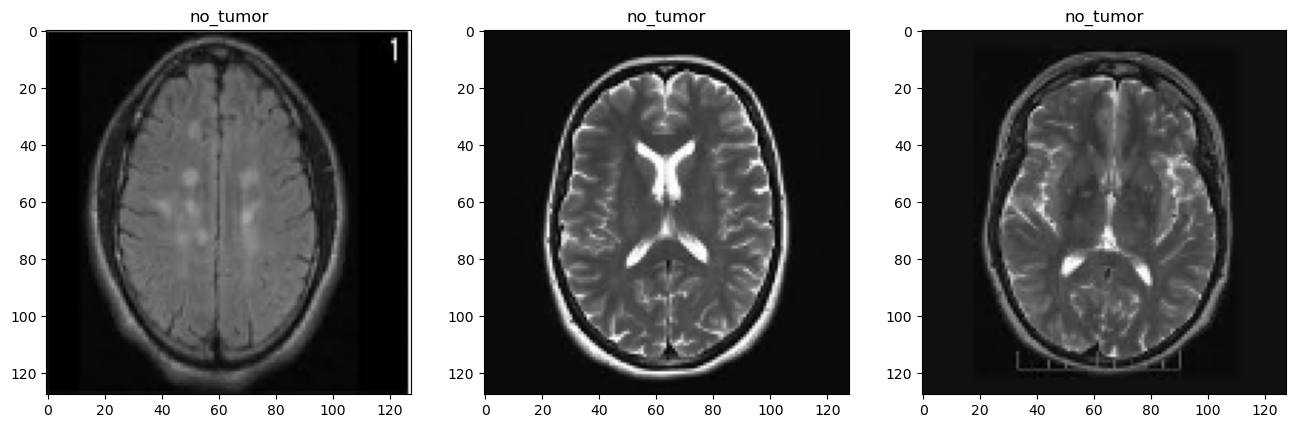

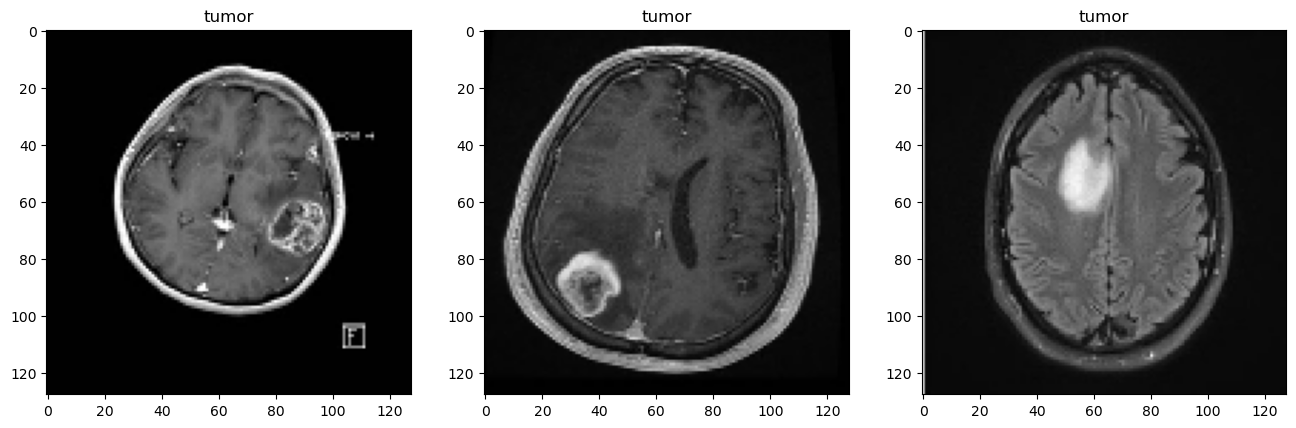

In [6]:
plot_random(no_tumor, tumor, num=3)

## Create Torch Dataset Class

In [7]:
class Dataset(object):
    
    def __getitem__(self,index):   # Used to retrieve a data item present at certain index
        raise NotImplementedError
        
    def __len__(self):           # Used to get length of data
        raise NotImplementedError
        
    def __add__(self,other):
        return ConcatDataset([self,other])

## Create MRI Custom Dataset Class

In [8]:
class MRI(Dataset):
    
    def __init__(self):
        tumor = []
        path = './Data/brain_tumor_dataset/yes/*.jpg'
        for f in glob.iglob(path):
            img = cv2.imread(f)
            img = cv2.resize(img, (128, 128))
            b, g, r = cv2.split(img)
            img = cv2.merge([r, g, b])
            img = img.reshape((img.shape[2], img.shape[0], img.shape[1]))
            tumor.append(img)

        no_tumor = []
        path = './Data/brain_tumor_dataset/no/*.jpg'
        for f in glob.iglob(path):
            img = cv2.imread(f)
            img = cv2.resize(img, (128, 128))
            b, g, r = cv2.split(img)
            img = cv2.merge([r, g, b])
            img = img.reshape((img.shape[2], img.shape[0], img.shape[1]))
            no_tumor.append(img)
        
        # Convert to numpy arrays
        tumor = np.array(tumor, dtype=np.float32) 
        no_tumor = np.array(no_tumor, dtype=np.float32)

        # Labels
        tumor_label = np.ones(tumor.shape[0], dtype=np.float32)
        no_tumor_label = np.zeros(no_tumor.shape[0], dtype=np.float32)

        # Combine
        self.images = np.concatenate((tumor, no_tumor), axis=0)
        self.labels = np.concatenate((tumor_label, no_tumor_label))

        # Normalize images
        self.normalize()
        
    def __len__(self):
        return self.images.shape[0]
        
    def __getitem__(self, index):
        sample = {'image': self.images[index], 'label': self.labels[index]}
        return sample
    
    def normalize(self):
        self.images = self.images / 255.0


## Create a Dataloader

## Without Dataloaders

In [9]:
mri = MRI()
mri.normalize()

In [10]:
index =  list(range(len(mri)))
random.shuffle(index)
for idx in index:
    sample = mri[idx]
    img = sample['image']
    print(img.shape)
    img = img.reshape(img.shape[1], img.shape[2], img.shape[0])
    print(img.shape)
    sys.exit()
    plt.imshow(img)

(3, 128, 128)
(128, 128, 3)


SystemExit: 

C:\Users\ayesh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3468: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
dataloader = DataLoader(mri, batch_size=10, shuffle=True)

In [11]:
for sample in dataloader:
    img = sample['image'].squeeze()
    print(img.shape)
    sys.exit()
    img = img.reshape(img.shape[1], img.shape[2], img.shape[0])
    plt.imshow(img)
    plt.show()
    

NameError: name 'dataloader' is not defined

## Create a Model

In [12]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.cnn_model = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2, stride=5),
        nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2, stride=5))
        
        self.fc_model = nn.Sequential(
        nn.Linear(in_features=256, out_features=120),
        nn.Tanh(),
        nn.Linear(in_features=120, out_features=84),
        nn.Tanh(),
        nn.Linear(in_features=84, out_features=1))
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        x = F.sigmoid(x)
        
        
        return x
        

In [13]:
model = CNN()

In [14]:
model

CNN(
  (cnn_model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=1, bias=True)
  )
)

In [15]:
model.cnn_model

Sequential(
  (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): Tanh()
  (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): Tanh()
  (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
)

In [16]:
model.cnn_model[0]

Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))

In [17]:
model.cnn_model[0].weight

Parameter containing:
tensor([[[[-0.0951, -0.0145, -0.0661, -0.0952, -0.0674],
          [-0.0164, -0.0590, -0.1084, -0.0780,  0.0109],
          [ 0.0599, -0.0238, -0.0663, -0.0882,  0.0783],
          [-0.0705, -0.0952,  0.0210, -0.0162,  0.0242],
          [ 0.0090, -0.1154, -0.0145,  0.0855,  0.0180]],

         [[-0.0564,  0.0182, -0.0283, -0.1130, -0.0219],
          [-0.0374,  0.0380, -0.0139,  0.0014,  0.0865],
          [ 0.0691,  0.0445,  0.0246, -0.0367, -0.0602],
          [-0.0749, -0.0786, -0.0869,  0.1149,  0.0970],
          [-0.0598,  0.1081,  0.0160, -0.0123,  0.0430]],

         [[ 0.0332, -0.0747, -0.0485, -0.1134, -0.0835],
          [-0.1051,  0.0773, -0.0676, -0.0465,  0.0669],
          [ 0.0072,  0.0642,  0.1048,  0.0893, -0.0779],
          [ 0.0885,  0.0156,  0.0211, -0.0400, -0.0615],
          [ 0.0112,  0.1019, -0.0714,  0.0827, -0.0153]]],


        [[[ 0.0466, -0.0502,  0.0423,  0.0974,  0.0420],
          [-0.0331,  0.0310,  0.0185,  0.0660,  0.0729],
 

In [18]:
model.cnn_model[0].weight.shape


torch.Size([6, 3, 5, 5])

In [19]:
model.cnn_model[0].weight[0].shape

torch.Size([3, 5, 5])

In [20]:
model.cnn_model[0].weight[0][0]

tensor([[-0.0951, -0.0145, -0.0661, -0.0952, -0.0674],
        [-0.0164, -0.0590, -0.1084, -0.0780,  0.0109],
        [ 0.0599, -0.0238, -0.0663, -0.0882,  0.0783],
        [-0.0705, -0.0952,  0.0210, -0.0162,  0.0242],
        [ 0.0090, -0.1154, -0.0145,  0.0855,  0.0180]],
       grad_fn=<SelectBackward0>)

## Linear Layer


In [21]:
model.fc_model

Sequential(
  (0): Linear(in_features=256, out_features=120, bias=True)
  (1): Tanh()
  (2): Linear(in_features=120, out_features=84, bias=True)
  (3): Tanh()
  (4): Linear(in_features=84, out_features=1, bias=True)
)

In [22]:
model.fc_model[0]

Linear(in_features=256, out_features=120, bias=True)

In [23]:
model.fc_model[0].weight.shape

torch.Size([120, 256])

## Evaluate New-Born Neural Network

In [24]:
mri_dataset = MRI()
mri_dataset.normalize()
device = torch.device('cpu')
model = CNN().to(device)

In [25]:
dataloader = DataLoader(mri_dataset, batch_size=32, shuffle=False)

In [26]:
model.eval()
output = []
y_true = []

with torch.no_grad():
    
    for D in dataloader:
        image = D['image'].to(device)
        label = D['label'].to(device)
        
        y_hat = model(image)
        
        output.append(y_hat.cpu().detach().numpy())
        y_true.append(label.cpu().detach().numpy())
        
        

In [27]:
output = np.concatenate(output, axis=0).squeeze()
y_true = np.concatenate(y_true, axis=0).squeeze()

In [28]:
def threshold(scores,threshold=0.50, minimum=0, maximum = 1.0):
    x = np.array(list(scores))
    x[x >= threshold] = maximum
    x[x <= threshold] = minimum
    return x

In [29]:
accuracy_score(y_true, threshold(output))

0.6285714285714286

[Text(0, 0.5, 'Tumor'), Text(0, 1.5, 'No_Tumor')]

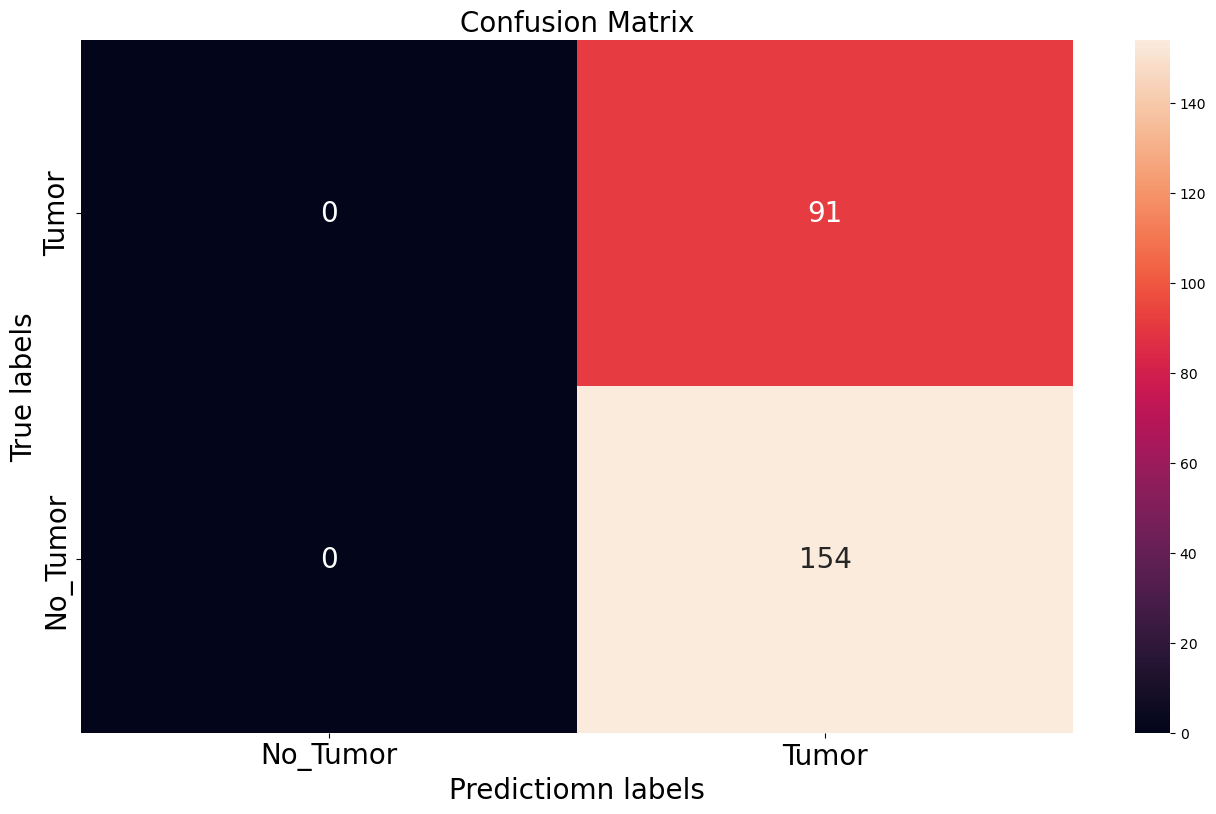

In [30]:
# Better confusion matrix
import seaborn as sns

plt.figure(figsize=(16,9))
cm = confusion_matrix(y_true, threshold(output))
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt ='g', ax=ax, annot_kws={"size":20})

#labels , title, and ticks
ax.set_xlabel('Predictiomn labels', fontsize=20)
ax.set_ylabel('True labels', fontsize=20)
ax.set_title('Confusion Matrix', fontsize=20)
ax.xaxis.set_ticklabels(['No_Tumor','Tumor'], fontsize=20)
ax.yaxis.set_ticklabels(['Tumor','No_Tumor'],fontsize=20)

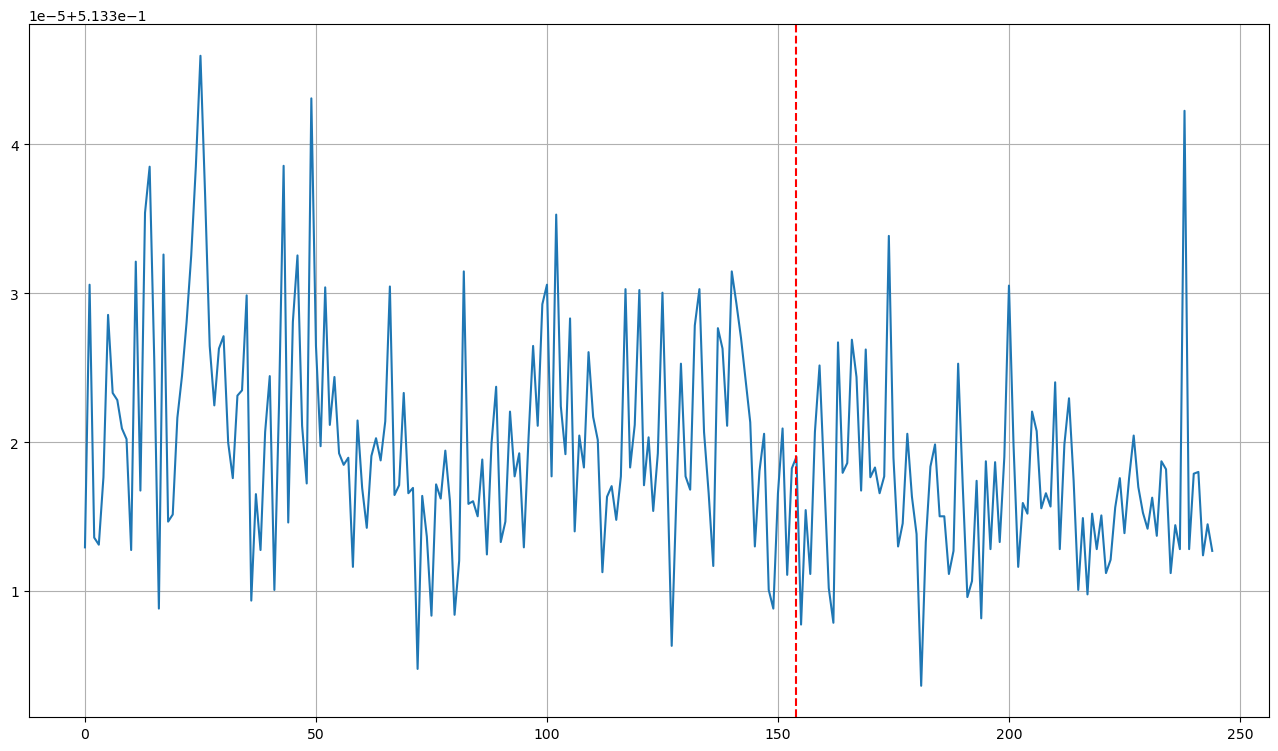

In [31]:
plt.figure(figsize=(16,9))
plt.plot(output)
plt.axvline(x=len(tumor), color='r', linestyle='--')
plt.grid()


## Training

In [32]:
eta = 0.001
EPOCH = 400
optimizer = torch.optim.Adam(model.parameters(), lr=eta)
dataloader = DataLoader(mri_dataset, batch_size=32, shuffle=True)
model.train()


CNN(
  (cnn_model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=1, bias=True)
  )
)

In [33]:
for epoch in range(1, EPOCH):
    losses = []
    for D in dataloader:
        optimizer.zero_grad()
        data = D['image'].to(device)
        label = D['label'].to(device)
        y_hat = model(data)
        # define loss function
        error = nn.BCELoss() 
        loss = torch.sum(error(y_hat.squeeze(), label))
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    if (epoch+1) % 10 == 0:
        print('Train Epoch: {}\tLoss: {:.6f}'.format(epoch+1, np.mean(losses)))


Train Epoch: 10	Loss: 0.657364
Train Epoch: 20	Loss: 0.614250
Train Epoch: 30	Loss: 0.562181
Train Epoch: 40	Loss: 0.555181
Train Epoch: 50	Loss: 0.518121
Train Epoch: 60	Loss: 0.500676
Train Epoch: 70	Loss: 0.489822
Train Epoch: 80	Loss: 0.477302
Train Epoch: 90	Loss: 0.466461
Train Epoch: 100	Loss: 0.458878
Train Epoch: 110	Loss: 0.448785
Train Epoch: 120	Loss: 0.446438
Train Epoch: 130	Loss: 0.418037
Train Epoch: 140	Loss: 0.394265
Train Epoch: 150	Loss: 0.380610
Train Epoch: 160	Loss: 0.327255
Train Epoch: 170	Loss: 0.280999
Train Epoch: 180	Loss: 0.258855
Train Epoch: 190	Loss: 0.207601
Train Epoch: 200	Loss: 0.189332
Train Epoch: 210	Loss: 0.142358
Train Epoch: 220	Loss: 0.099642
Train Epoch: 230	Loss: 0.070820
Train Epoch: 240	Loss: 0.040668
Train Epoch: 250	Loss: 0.023648
Train Epoch: 260	Loss: 0.014601
Train Epoch: 270	Loss: 0.010089
Train Epoch: 280	Loss: 0.007086
Train Epoch: 290	Loss: 0.005387
Train Epoch: 300	Loss: 0.004345
Train Epoch: 310	Loss: 0.003396
Train Epoch: 320	

## Evaluate a smart model

In [34]:
model.eval()
dataloader = DataLoader(mri_dataset, batch_size=32, shuffle=False)
output = []
y_true = []

with torch.no_grad():
    
    for D in dataloader:
        image = D['image'].to(device)
        label = D['label'].to(device)
        
        y_hat = model(image)
        
        output.append(y_hat.cpu().detach().numpy())
        y_true.append(label.cpu().detach().numpy())
        
output = np.concatenate(output, axis=0)
y_true = np.concatenate(y_true, axis=0)  

In [35]:
accuracy_score(y_true, threshold(output))

1.0

[Text(0, 0.5, 'Tumor'), Text(0, 1.5, 'No_Tumor')]

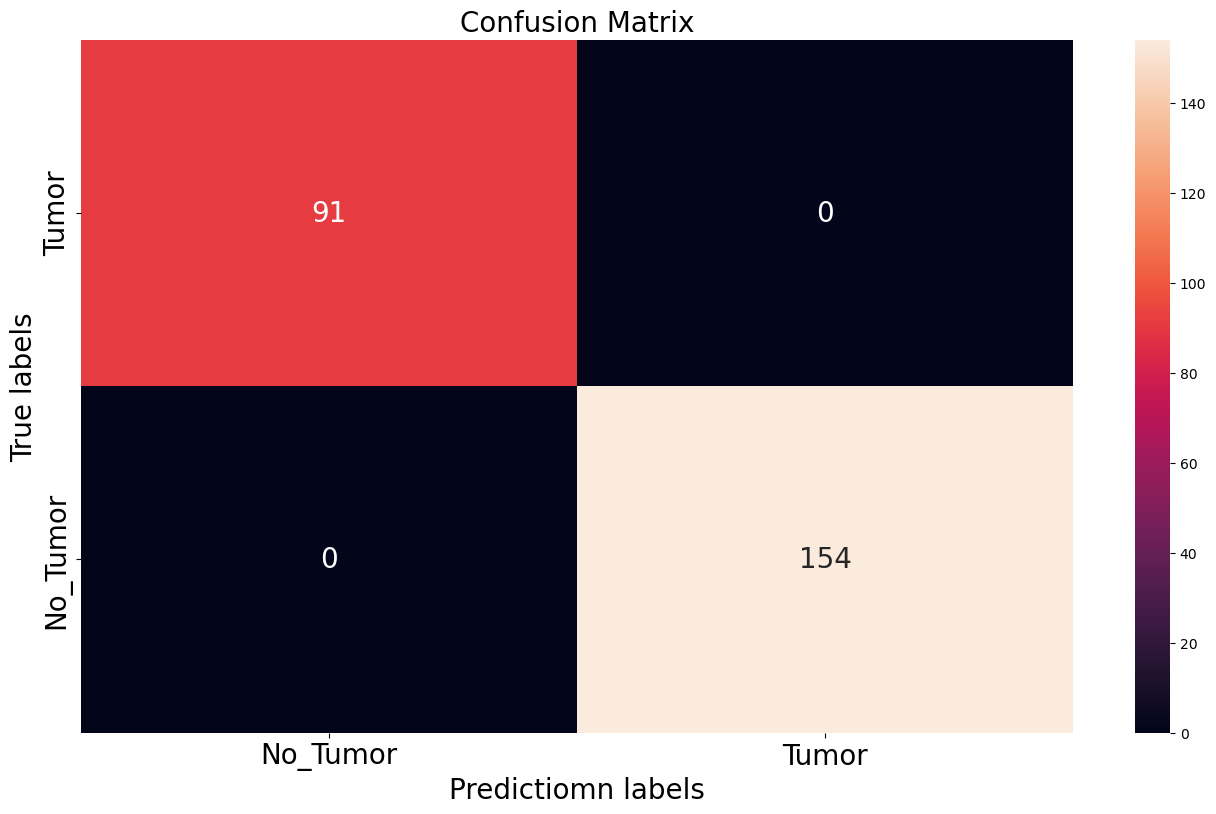

In [36]:
plt.figure(figsize=(16,9))
cm = confusion_matrix(y_true, threshold(output))
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt ='g', ax=ax, annot_kws={"size":20})

#labels , title, and ticks
ax.set_xlabel('Predictiomn labels', fontsize=20)
ax.set_ylabel('True labels', fontsize=20)
ax.set_title('Confusion Matrix', fontsize=20)
ax.xaxis.set_ticklabels(['No_Tumor','Tumor'], fontsize=20)
ax.yaxis.set_ticklabels(['Tumor','No_Tumor'],fontsize=20)

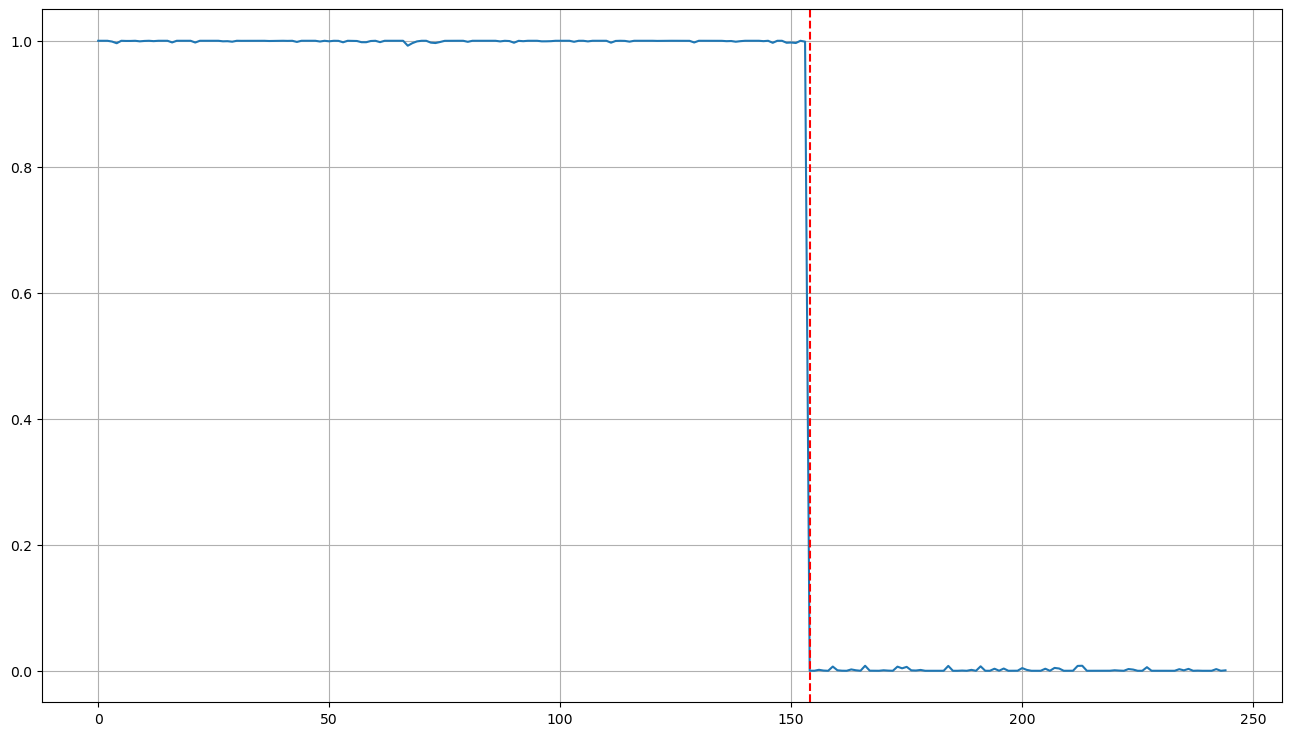

In [37]:
plt.figure(figsize=(16,9))
plt.plot(output)
plt.axvline(x=len(tumor), color='r', linestyle='--')
plt.grid()

## Visualize the feature maps of convolutional filters

In [38]:
model

CNN(
  (cnn_model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=1, bias=True)
  )
)

In [39]:
no_of_layers = 0
conv_layers = []


In [40]:
model_children = list(model.children())
model_children

[Sequential(
   (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
   (1): Tanh()
   (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
   (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
   (4): Tanh()
   (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
 ),
 Sequential(
   (0): Linear(in_features=256, out_features=120, bias=True)
   (1): Tanh()
   (2): Linear(in_features=120, out_features=84, bias=True)
   (3): Tanh()
   (4): Linear(in_features=84, out_features=1, bias=True)
 )]

In [41]:
for child in model_children:
    if type(child) == nn.Sequential:
        for layer in child.children():
            if type(layer) == nn.Conv2d:
                no_of_layers += 1
                conv_layers.append(layer)
            

In [42]:
conv_layers

[Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1)),
 Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))]

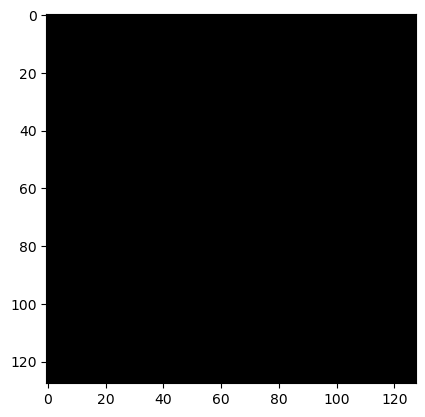

In [43]:
img = mri_dataset[100]['image']
plt.imshow(img.reshape(128,128,3))

In [44]:
img = torch.from_numpy(img).to(device)

In [45]:
img.shape

torch.Size([3, 128, 128])

In [46]:
img = img.unsqueeze(0)
img.shape

torch.Size([1, 3, 128, 128])

In [47]:
results = [conv_layers[0](img)]
for i in range(1, len(conv_layers)):
    results.append(conv_layers[i](results[-1]))
    
outputs = results    

In [48]:
len(outputs)

2

In [49]:
outputs[0].shape

torch.Size([1, 6, 124, 124])

Layer  1


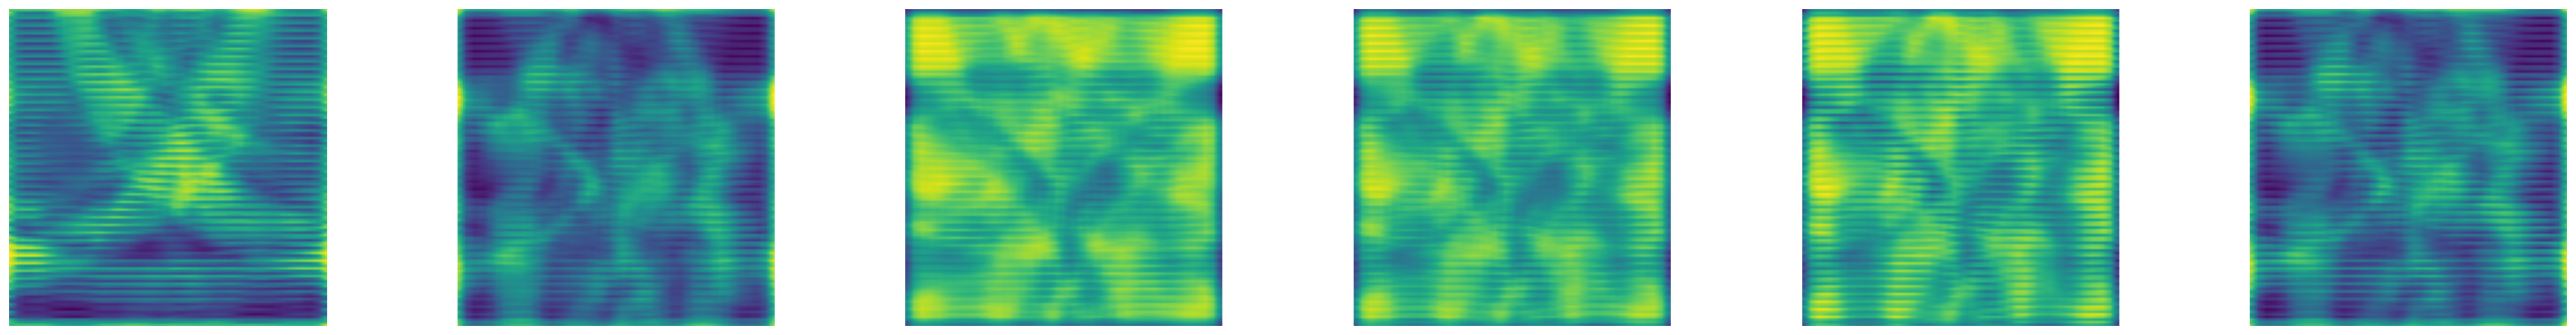

Layer  2


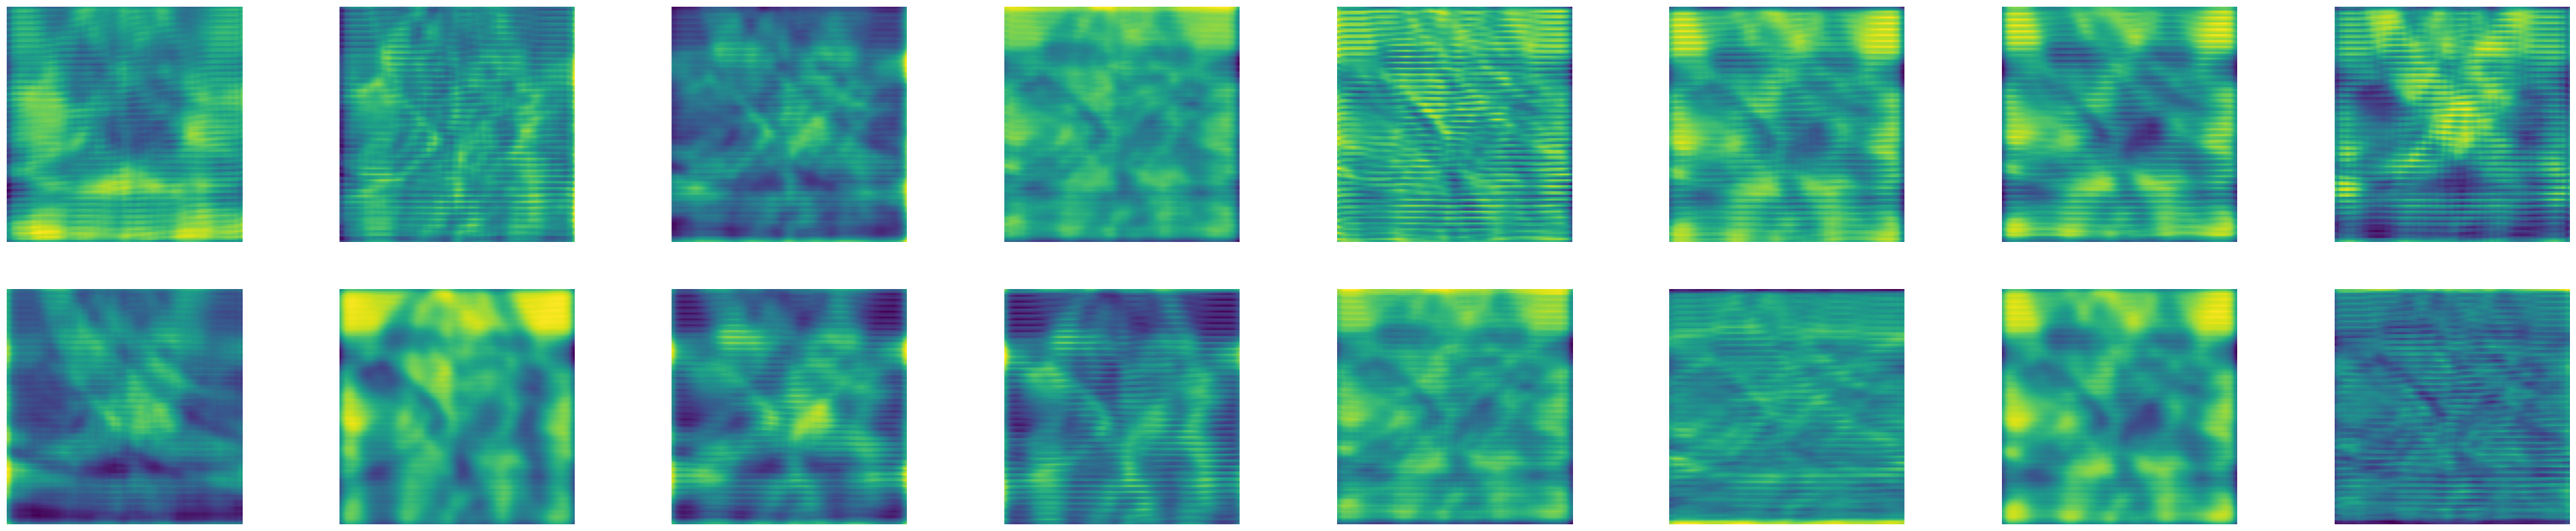

In [50]:

for num_layer in range(len(outputs)):
    plt.figure(figsize=(50, 10))
    layer_viz = outputs[num_layer].squeeze()
    print("Layer ",num_layer+1)
    for i, f in enumerate(layer_viz):
        plt.subplot(2, 8, i + 1)
        plt.imshow(f.detach().cpu().numpy())
        plt.axis("off")
    plt.show()
    plt.close()

## Preparing a validation set

In [51]:
from sklearn.model_selection import train_test_split


In [52]:
class MRI(Dataset):
    
    def __init__(self):
        
        #variables to hold the training data and validation data
        self.x_train, self.y_train, self.x_val, self.y_val = None, None, None, None
        
        #a variable to determine if we are interested in retrieving the training or the validation data
        self.mode = 'train'
        
        tumor= []
        no_tumor = []
        
         # cv2 - It reads in BGR format by default
        for f in glob.iglob("./data/brain_tumor_dataset/yes/*.jpg"):
            img = cv2.imread(f)
            img = cv2.resize(img,(128,128)) # I can add this later in the boot-camp for more adventure
            b, g, r = cv2.split(img)
            img = cv2.merge([r,g,b])
            img = img.reshape((img.shape[2],img.shape[0],img.shape[1])) # otherwise the shape will be (h,w,#channels)
            tumor.append(img)

        for f in glob.iglob("./data/brain_tumor_dataset/no/*.jpg"):
            img = cv2.imread(f)
            img = cv2.resize(img,(128,128)) 
            b, g, r = cv2.split(img)
            img = cv2.merge([r,g,b])
            img = img.reshape((img.shape[2],img.shape[0],img.shape[1]))
            no_tumor.append(img)

        # our images
        tumor = np.array(tumor,dtype=np.float32)
        no_tumor = np.array( no_tumor,dtype=np.float32)
        
        # our labels
        tumor_label = np.ones(tumor.shape[0], dtype=np.float32)
        no_tumor_label = np.zeros(no_tumor.shape[0], dtype=np.float32)
        
        # Concatenates
        self.images = np.concatenate((tumor,  no_tumor), axis=0)
        self.labels = np.concatenate((tumor_label,  no_tumor_label))
    
    # Define a function that would separate the data into Training and Validation sets
    def train_val_split(self):
        self.X_train, self.X_val, self.y_train, self.y_val = \
        train_test_split(self.images, self.labels, test_size=0.20, random_state=42)
        
    def __len__(self):
        # Use self.mode to deetrmine whether train or val data is of interest
        if self.mode == 'train':
            return self.X_train.shape[0]
        elif self.mode == 'val':
            return self.X_val.shape[0]
    
    def __getitem__(self, idx):
        # Use self.mode to deetrmine whether train or val data is of interest
        if self.mode== 'train':
            sample = {'image': self.X_train[idx], 'label': self.y_train[idx]}
        
        elif self.mode== 'val':
            sample = {'image': self.X_val[idx], 'label': self.y_val[idx]}
        
        return sample
    
    def normalize(self):
        self.images = self.images/255.0

## Check if we are overfitting

In [53]:

mri_dataset = MRI()
mri_dataset.normalize()
mri_dataset.train_val_split()

In [54]:

train_dataloader = DataLoader(mri_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(mri_dataset, batch_size=32, shuffle=False)

In [55]:
device = torch.device("cpu")
model = CNN().to(device)


In [56]:

eta=0.0001
optimizer = torch.optim.Adam(model.parameters(), lr=eta)

In [57]:

# keep track of epoch losses
epoch_train_loss = []
epoch_val_loss = []

In [58]:
for epoch in range(1,600):
    train_losses = []
    # train for the current epoch
    model.train()
    mri_dataset.mode = 'train'
    for D in train_dataloader:
        # Train the model
        optimizer.zero_grad()
        data = D['image'].to(device)
        label = D['label'].to(device)
        
        y_hat = model(data)
        error = nn.BCELoss()
        loss = torch.sum(error(y_hat.squeeze(), label))
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
    
    epoch_train_loss.append(np.mean(train_losses))
    
    # validate for the current epoch
    val_losses = []
    model.eval()
    
    mri_dataset.mode = 'val'
    
    with torch.no_grad():
        for D in val_dataloader:            
            data = D['image'].to(device)
            label = D['label'].to(device)
            y_hat = model(data)
            error = nn.BCELoss()
            loss = torch.sum(error(y_hat.squeeze(), label))
            val_losses.append(loss.item())
    
    epoch_val_loss.append(np.mean(val_losses))
    
    if (epoch+1) % 10 == 0:
        print('Train Epoch: {}\tTrain Loss: {:.6f}\tVal Loss: {:.6f}'.format(epoch+1, np.mean(train_losses),np.mean(val_losses)))
    

Train Epoch: 10	Train Loss: 0.612380	Val Loss: 0.598529
Train Epoch: 20	Train Loss: 0.595578	Val Loss: 0.588276
Train Epoch: 30	Train Loss: 0.578355	Val Loss: 0.545710
Train Epoch: 40	Train Loss: 0.565029	Val Loss: 0.557044
Train Epoch: 50	Train Loss: 0.494289	Val Loss: 0.555777
Train Epoch: 60	Train Loss: 0.478933	Val Loss: 0.574414
Train Epoch: 70	Train Loss: 0.468726	Val Loss: 0.576064
Train Epoch: 80	Train Loss: 0.467014	Val Loss: 0.660228
Train Epoch: 90	Train Loss: 0.542108	Val Loss: 0.640044
Train Epoch: 100	Train Loss: 0.413382	Val Loss: 0.640678
Train Epoch: 110	Train Loss: 0.435816	Val Loss: 0.678750
Train Epoch: 120	Train Loss: 0.383163	Val Loss: 0.667456
Train Epoch: 130	Train Loss: 0.378760	Val Loss: 0.679625
Train Epoch: 140	Train Loss: 0.347188	Val Loss: 0.710760
Train Epoch: 150	Train Loss: 0.349534	Val Loss: 0.726260
Train Epoch: 160	Train Loss: 0.348801	Val Loss: 0.731678
Train Epoch: 170	Train Loss: 0.319188	Val Loss: 0.759067
Train Epoch: 180	Train Loss: 0.373363	Va

Text(0, 0.5, 'Loss')

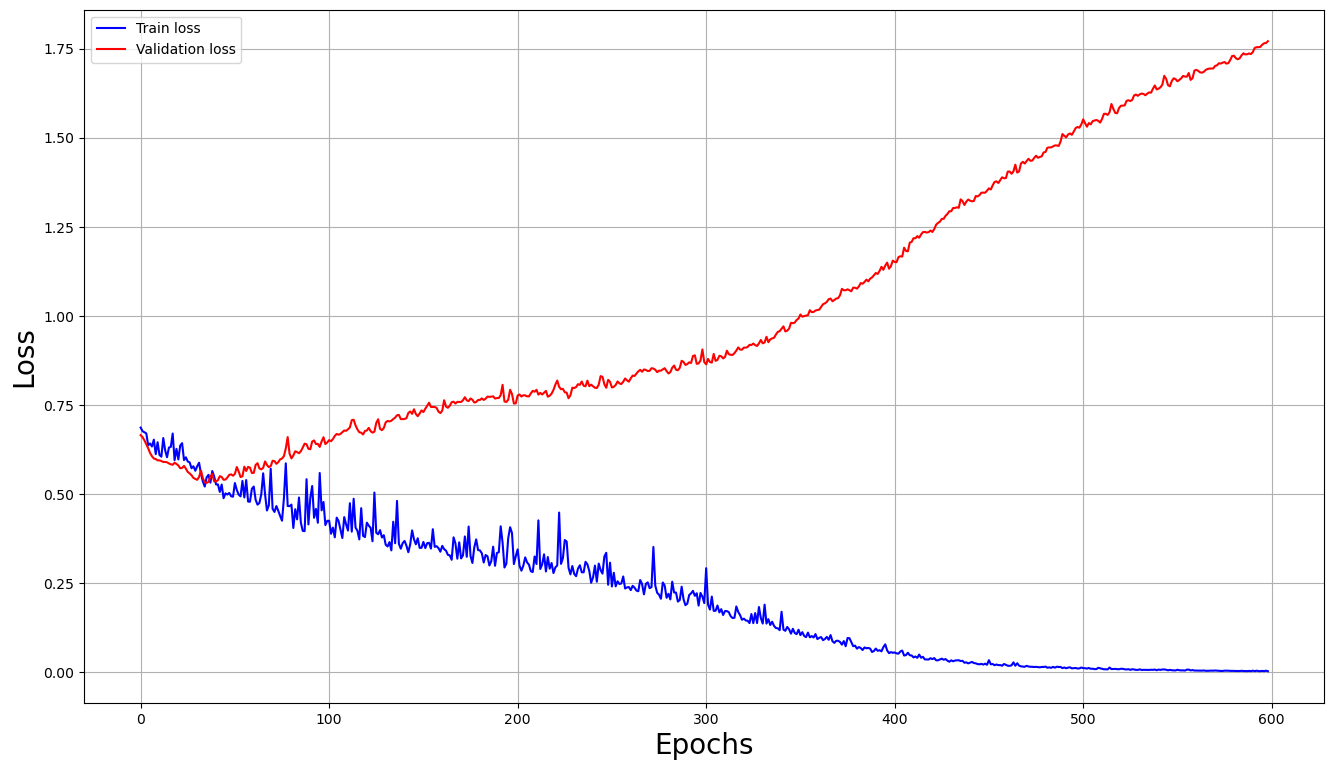

In [59]:

plt.figure(figsize=(16,9))
plt.plot(epoch_train_loss, c='b', label='Train loss')
plt.plot(epoch_val_loss, c='r', label = 'Validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Loss', fontsize=20)

## Testing

In [86]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # normalization
])


train_path = r"C:\Users\ayesh\BRAIN MRI PROJECT\Data\train"
test_path = r"C:\Users\ayesh\BRAIN MRI PROJECT\Data\test"

train_dataset = datasets.ImageFolder(train_path, transform=transform)
test_dataset = datasets.ImageFolder(test_path, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"Train samples: {len(train_dataset)}, Test samples: {len(test_dataset)}")

# Define CNN Model 
class BrainTumorCNN(nn.Module):
    def __init__(self):
        super(BrainTumorCNN, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1),  # 64x64 -> 64x64
            nn.ReLU(),
            nn.MaxPool2d(2, 2),              # 64x64 -> 32x32
            nn.Conv2d(16, 32, 3, padding=1), # 32x32 -> 32x32
            nn.ReLU(),
            nn.MaxPool2d(2, 2),              # 32x32 -> 16x16
            nn.Conv2d(32, 64, 3, padding=1), # 16x16 -> 16x16
            nn.ReLU(),
            nn.MaxPool2d(2, 2)               # 16x16 -> 8x8
        )
        self.fc_model = nn.Sequential(
            nn.Linear(64*8*8, 120),
            nn.ReLU(),
            nn.Linear(120, 2)  # 2 classes: yes, no
        )

    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc_model(x)
        return x

# Initialize model 
model = BrainTumorCNN().to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

#Training
EPOCHS = 10
for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{EPOCHS}], Loss: {running_loss/len(train_loader):.4f}")

# Testing 
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


torch.save(model.state_dict(), "brain_tumor_model.pth")
print("Model saved as brain_tumor_model.pth")


Using device: cpu
Train samples: 202, Test samples: 51
Epoch [1/10], Loss: 0.6633
Epoch [2/10], Loss: 0.6074
Epoch [3/10], Loss: 0.5768
Epoch [4/10], Loss: 0.5844
Epoch [5/10], Loss: 0.5774
Epoch [6/10], Loss: 0.5055
Epoch [7/10], Loss: 0.4492
Epoch [8/10], Loss: 0.4554
Epoch [9/10], Loss: 0.3792
Epoch [10/10], Loss: 0.3375
Test Accuracy: 70.59%
Model saved as brain_tumor_model.pth


In [76]:
import os
import shutil
import random

# Paths
source_dir = r"C:\Users\ayesh\BRAIN MRI PROJECT\Data\brain_tumor_dataset"
train_dir = r"C:\Users\ayesh\BRAIN MRI PROJECT\Data\train"
test_dir = r"C:\Users\ayesh\BRAIN MRI PROJECT\Data\test"

# Train/Test split ratio
split_ratio = 0.8

# Make train/test directories
for folder in ["yes", "no"]:
    os.makedirs(os.path.join(train_dir, folder), exist_ok=True)
    os.makedirs(os.path.join(test_dir, folder), exist_ok=True)

    # Get all images for this class
    files = os.listdir(os.path.join(source_dir, folder))
    random.shuffle(files)

    split_point = int(len(files) * split_ratio)

    # Move to train
    for file in files[:split_point]:
        shutil.copy(
            os.path.join(source_dir, folder, file),
            os.path.join(train_dir, folder, file)
        )

    # Move to test
    for file in files[split_point:]:
        shutil.copy(
            os.path.join(source_dir, folder, file),
            os.path.join(test_dir, folder, file)
        )

print("Dataset split complete!")


Dataset split complete!


In [84]:
import torch
from torchvision import transforms
from PIL import Image
import torch.nn as nn


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])


class BrainTumorCNN(nn.Module):
    def __init__(self):
        super(BrainTumorCNN, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(64*8*8, 120),
            nn.ReLU(),
            nn.Linear(120, 2)
        )

    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x


model = BrainTumorCNN().to(device)
model.load_state_dict(torch.load("brain_tumor_model.pth", map_location=device))
model.eval()

# Prediction function 
def predict_image(img_path):
    img = Image.open(img_path).convert("RGB")
    img = transform(img).unsqueeze(0).to(device)  
    with torch.no_grad():
        outputs = model(img)
        _, predicted = torch.max(outputs, 1)
        class_names = ["No Tumor", "Yes Tumor"]
        return class_names[predicted.item()]

#Example
image_path = r"C:\Users\ayesh\BRAIN MRI PROJECT\Data\brain_tumor_dataset\b570da3d12f1210817bd9c33189269_big_gallery.jpeg"  # Change to your image path
prediction = predict_image(image_path)
print(f"Prediction for {image_path}: {prediction}")


Prediction for C:\Users\ayesh\BRAIN MRI PROJECT\Data\brain_tumor_dataset\b570da3d12f1210817bd9c33189269_big_gallery.jpeg: No Tumor
